# Principle Component Analysis (PCA) Vs Linear Discriminant Analysis (LDA)

In [1]:
from sklearn.datasets import load_wine

In [5]:
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
import pandas as pd
import numpy as np

In [7]:
X = pd.DataFrame(data.data, columns = data.feature_names)

In [8]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
Y = pd.Categorical.from_codes(data.target, data.target_names)

In [12]:
Y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [13]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
#df = X.join(pd.Series(Y, name='class'))
#y = L.fit_transform(data['class'])
y = L.fit_transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [17]:
lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage = 'auto')

In [18]:
X_lda = lda.fit_transform(X,Y)

In [19]:
lda.explained_variance_ratio_

array([0.69458712, 0.34260436])

In [20]:
transformed_lda = lda.transform(X)

In [21]:
transformed_lda

array([[-12.95101554,  18.28911661],
       [-12.42913367,  17.10675964],
       [-11.86081195,  17.58615827],
       [-12.92483637,  20.43067673],
       [-10.09173636,  16.50983941],
       [-12.71884427,  19.71751902],
       [-12.59442534,  19.2450674 ],
       [-12.29975229,  19.22717591],
       [-12.03214458,  18.40275495],
       [-11.9877066 ,  17.95581343],
       [-13.32569798,  18.88513945],
       [-11.6092238 ,  18.46262945],
       [-11.97185519,  18.41709918],
       [-13.45472221,  18.42096992],
       [-13.82141278,  19.95446652],
       [-11.75350033,  18.98048258],
       [-11.48891195,  19.3065422 ],
       [-11.26316791,  18.11405713],
       [-13.44925524,  20.43487467],
       [-11.43961746,  17.78557399],
       [-12.20046152,  16.98119347],
       [-10.38937302,  16.55160873],
       [-13.0585712 ,  17.04853116],
       [-11.65316872,  16.42985881],
       [-11.83494526,  16.27130964],
       [-10.59619855,  16.26484744],
       [-12.02244845,  18.11502102],
 

In [22]:
transformed_lda.shape

(178, 2)

# Apply PCA Now

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components = 2)

In [26]:
X_pca = pca.fit_transform(X,Y)

In [27]:
transformed_pca = pca.transform(X)

In [28]:
transformed_pca

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

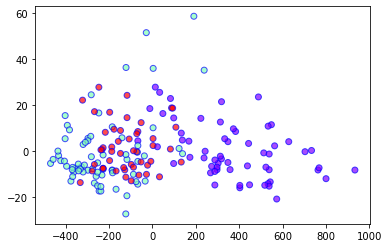

In [48]:
import matplotlib.pyplot as plt
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [49]:
X_pca[:,0].shape

(178,)

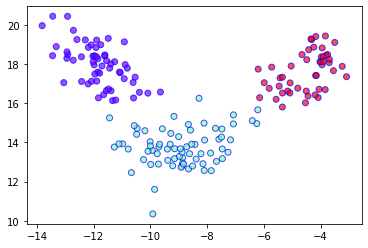

In [50]:
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

# Clarity